In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from perceptron import Perceptron

In [24]:
df = pd.read_csv('input/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
df['Sex'] = df['Sex'].replace(['F','M','I'] , [0,1,2])

C:\Users\USER\AppData\Local\Temp\ipykernel_10252\2584752267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(['F','M','I'] , [0,1,2])


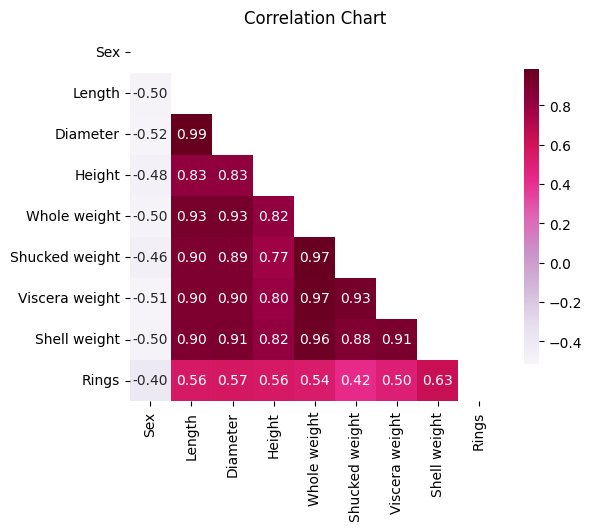

In [26]:
correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f', mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Chart')
plt.show()

In [27]:
X = df.drop(columns=["Sex", "Rings"]).values
y = df["Rings"].values

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [29]:
perceptron_model = Perceptron(lr_w=0.001, lr_b=0.001, epochs=100)
perceptron_model.fit(X_train, y_train)

Epoch 1 done. Loss: 2.0109621494706396
Epoch 2 done. Loss: 1.9921413519902962
Epoch 3 done. Loss: 1.9850133158827248
Epoch 4 done. Loss: 1.979818580067433
Epoch 5 done. Loss: 1.9747517515806647
Epoch 6 done. Loss: 1.9690335302574697
Epoch 7 done. Loss: 1.9629014525430601
Epoch 8 done. Loss: 1.9564869672675158
Epoch 9 done. Loss: 1.949909487462479
Epoch 10 done. Loss: 1.9432743293333885
Epoch 11 done. Loss: 1.9366680256728812
Epoch 12 done. Loss: 1.9301612516754563
Epoch 13 done. Loss: 1.9237282727444383
Epoch 14 done. Loss: 1.9173703513756215
Epoch 15 done. Loss: 1.9111271023039018
Epoch 16 done. Loss: 1.9050103556315732
Epoch 17 done. Loss: 1.8990597552509787
Epoch 18 done. Loss: 1.893277346533639
Epoch 19 done. Loss: 1.8876088837762037
Epoch 20 done. Loss: 1.8820567173007932
Epoch 21 done. Loss: 1.876641602583127
Epoch 22 done. Loss: 1.8713106167341207
Epoch 23 done. Loss: 1.8661115380519049
Epoch 24 done. Loss: 1.8610321010401198
Epoch 25 done. Loss: 1.8560646499659779
Epoch 26 done

In [30]:
y_pred = perceptron_model.predict(X_test)

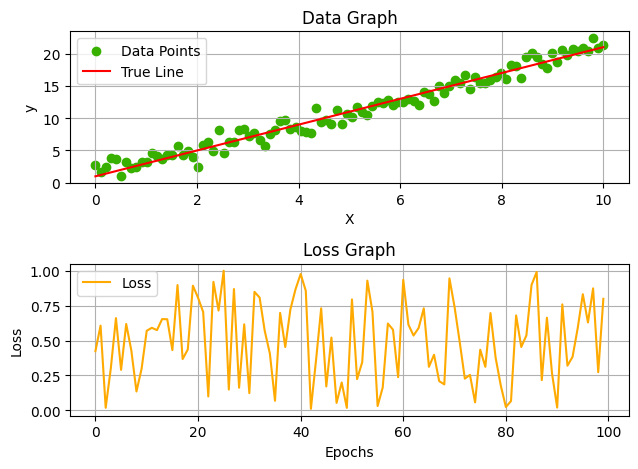

In [31]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, X.shape)  
losses = np.random.rand(100)  

fig, axs = plt.subplots(2, 1) 

axs[0].scatter(X, y, color='#38b000', label='Data Points')
axs[0].plot(X, 2 * X + 1, color='red', label='True Line') 
axs[0].set_title('Data Graph')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid()

axs[1].plot(losses, color='#ffaa00', label='Loss')
axs[1].set_title('Loss Graph')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid()

plt.tight_layout()  
plt.show()